# Derivatives of curved lines, and the limit

### Learning objectives

* Understand that derivatives are the instantaneous rate of change of a function
* Understand how to calculate a derivative 
* Understand how to express taking a derivative at a given point, and evaluating a function at a given point mathematically

### Introduction

In the last lesson, we saw that the derivative was the rate of change.

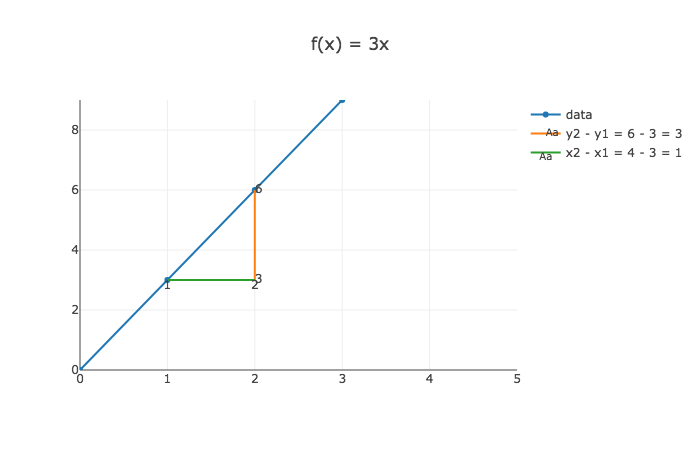

We saw multiple ways of calculating this rate of change.  
*  Essentially, the derivative is the rate of change of a function
* Graphically this is rise over run
* Which can be calculated by taking two points, $(x_1, y_1)$ and $(x_2, y_2)$ and calculating $\frac{y_2 - y_1}{x_2 - x_1}$

Finally, we said that when we have a function $f(x)$, we can calculate the derivative with knowing the starting point and the change in our input, $x$: 

$$ \frac{f(x_1 + \Delta x) - f(x_1)}{\Delta x} $$


### Derivatives of non-linear functions

So we saw previously that the derivative is the rate of change of our function.  We express this as $ f'(x) = \frac{\Delta f}{\Delta x}$. So far we have only calculated the derivatives with linear functions. As we'll see, things becomes trickier when working with more complicated functions.

For example, let's imagine that we are coaching our runner to perform in a track meet.  

We may want to know how well our track start does at one part of the race, say the starting point, versus another point later in the race.  Then we will know what to focus on in practice.  We can imagine the distance travelled by our track star's distance through time as represented by the function $f(x) = x^2$: 

In [1]:
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

#from graph import plot, build_layout ---> write it again to avoid errors
def plot(traces, layout = {}):
    if not isinstance(traces, list): raise TypeError('first argument must be a list.  Instead is', traces)
    plotly.offline.iplot({'data': traces, 'layout': layout})
def build_layout(x_axis = None, y_axis = None, options = {}):
    layout = {}
    if isinstance(x_axis, list): layout.update({'xaxis': {'range': x_axis}})
    if isinstance(y_axis, list): layout.update({'yaxis': {'range': y_axis}})
    layout.update(options)
    return layout

#from calculus import function_values_trace ---> write it again to avoid errors
def output_at(list_of_terms, x_value):  
    return list_of_terms[0][0] * (x_value**list_of_terms[0][1])
def trace_values(x_values, y_values, mode = 'markers', name="data", text = []):
    return {'x': x_values, 'y': y_values, 'mode': mode, 'name': name, 'text': text}
def function_values_trace(list_of_terms, x_values):
    function_values = list(map(lambda x_value: output_at(list_of_terms, x_value), x_values))
    return trace_values(x_values, function_values, mode = 'lines+markers')
    
x_squared = [(1, 2)]
range_twenty_four = list(range(0, 25))
six = list(map(lambda x: x/4.0, range_twenty_four))

trace_x_squared = function_values_trace(x_squared, six)
layout = build_layout(x_axis = {'title': 'number of seconds'}, y_axis = {'title': 'distance'})
plot([trace_x_squared], layout)

> The graph shows that from seconds zero through six, our track runner gets faster over time.  


#### Calculating speed at second two
Now if we want to see how quickly our track star at second number two as opposed to some other second, what would we do?  Well even if we knew nothing about derivatives, we would likely get a stop watch and at second 2 would use it to calculate the speed.  Let's say that we start our stopwatch at second 2 and stop our stopwatch one second later.

In [2]:
#from calculus import delta_traces ---> write it again to avoid errors
def delta_f(list_of_terms, x_value, delta_x):
    first_term = output_at(list_of_terms, x_value + delta_x)
    second_term =  output_at(list_of_terms, x_value)
    return first_term - second_term
def delta_f_trace(list_of_terms, x_value, delta_x):
    initial_f_value = output_at(list_of_terms, x_value)
    delta_f_value = delta_f(list_of_terms, x_value, delta_x)
    if initial_f_value and delta_f_value:
        trace =  trace_values(x_values=[x_value + delta_x, x_value + delta_x], 
                              y_values=[initial_f_value, initial_f_value + delta_f_value], mode = 'lines+markers',
                              name = 'delta f = ' + str(delta_x))
        return trace
def delta_x_trace(list_of_terms, x_value, delta_x):
    initial_f_value = output_at(list_of_terms, x_value)
    if initial_f_value:
        trace = trace_values(x_values=[x_value, x_value + delta_x],
                            y_values=[initial_f_value, initial_f_value], mode = 'lines+markers', 
                            name = 'delta x = ' + str(delta_x))
        return trace
def derivative_of(list_of_terms, x_value, delta_x):
    numerator = delta_f(list_of_terms, x_value, delta_x)
    denominator = delta_x
    return round(numerator/denominator, 3)
def derivative_trace(list_of_terms, x_value, line_length = 4, delta_x = .01):
    derivative_at = derivative_of(list_of_terms, x_value, delta_x)
    y = output_at(list_of_terms, x_value)
    if derivative_at and y:
        x_minus = x_value - line_length/2
        x_plus = x_value + line_length/2
        y_minus = y - derivative_at * line_length/2
        y_plus = y + derivative_at * line_length/2
        return trace_values([x_minus, x_value, x_plus],[y_minus, y, y_plus], name = "f' (x) = " + str(derivative_at), mode = 'lines+markers')
def delta_traces(list_of_terms, x_value, line_length = 4, delta_x = .01):
    tangent = derivative_trace(list_of_terms, x_value, line_length, delta_x)
    delta_f_line = delta_f_trace(list_of_terms, x_value, delta_x)
    delta_x_line = delta_x_trace(list_of_terms, x_value, delta_x)
    return [tangent, delta_f_line, delta_x_line]

delta_layout = build_layout(x_axis = {'title': 'number of seconds'}, y_axis = {'title': 'distance'})
x_squared_delta_traces = delta_traces(x_squared, 2, line_length = 2, delta_x = 1)
plot([trace_x_squared, *x_squared_delta_traces], delta_layout)

As the graph above shows, we measure the change at second two by starting our stopwatch at second 2 and stopping it one second later.  So turning this into our formula for calculating a derivative of:  

$$ f'(x) = \frac{f(x + \Delta x) - f(x)}{\Delta x}  $$

we do the following: 
* Set $x = 2$, as that's the point we want to calculate the rate of change at 
* Set $\Delta x = 1$, as that's the number of seconds that elapsed on our stopwatch

and plugging in these values, we have: 

$$ f'(2) =  \frac{f(2 + 1) - f(2)}{ 1} =  \frac{f(3) - f(2)}{1} $$ 

So our rate of change at second number 2, with a $\Delta x = 1$ is calculated by subtracting the function's output at second 2 from the function's output at second 3 and dividing by delta x, one. 

Simplifying our calculation of $f'(x)$ further by calculating the outputs at x = 2 and x = 3 we have:

* $f(3) = (3)^2 = 9$ is the output at x = 3 and 
* $f(2) = (2)^2 = 4$ is the output at x = 2 so 

$$f'(2) =  \frac{9 - 4}{1} = \frac{5}{1} = 5 $$

In [3]:
#from graph import plot
x_squared = [(1, 2)]

x_squared_delta_traces = delta_traces(x_squared, 2, line_length = 4, delta_x = 1)

layout = build_layout(x_axis = {'title': 'number of seconds', 'range': [1.5, 4]}, y_axis = {'title': 'distance', 'range': [0, 12]})
plot([trace_x_squared, *x_squared_delta_traces ], layout)

### The problem with our derivative formula

Take a close look at the straight line in the graph above.  That straight line is a supposed to be the rate of change of the function at the point $x = 2$.  And it comes close.  But it doesn't exactly line up.  Our orange line quickly begins to move above the blue line, indicating that it has a faster rate of change than the blue line at $x = 2$.  This means that our calculation that $f'(1) = 5 $ is a little high.

Here is **the problem:**

* in our formula of $ f'(x) = \frac{f(x_1 + \Delta x) - f(x_1)}{\Delta x} $, we are seeing the rate of change not just where x = 2, but from the period from $x = 2$ to $x = 3$.  

In [4]:
x_squared_delta_traces = delta_traces(x_squared, 2, line_length = 4, delta_x = 1)

layout = build_layout(x_axis = {'title': 'number of seconds', 'range': [1.5, 3.5]}, y_axis = {'title': 'distance', 'range': [0, 12]})
plot([trace_x_squared, *x_squared_delta_traces ], layout)

In other words, **the runner would tell us** that we are not capturing their speed at precisely second two: 

> This is because in between the clicks of our stopwatch from seconds two to three, our runner is getting faster and while we are supposed to be calculating his speed just at second 2, our calculation includes his increase in speed from seconds two to three.

> Therefore, the orange line has a larger rate of change than the blue line because we have included this increase in speed at second three.

**A mathematician would make the same point** that we are not actually calculating the derivative: 

> Our derivative means we are calculating how fast a function is changing at any given moment, and precisely at that moment.  And unlike in where our functions were linear, here the rate of change of our function is always changing.  The larger our value of $\Delta x$, the less our derivative reflects the rate of change at just that point. 

### The solution: Decrease the change in x

If you were holding a stopwatch and someone asked you to calculate their speed at second number 2, how could you be more accurate?  Well, you would want decrease the change in seconds.  Of course, our runner could continue to protest and say that we are still influenced by the speed at other times.

However, the mathematician has a solution to this. To calculate the rate of change at precisely one point, the solution is to use our imagination.  We calculate the derivative with a $\Delta $ of 1, then calculate it again with a $\Delta x$ of .1, then again with $\Delta x$ of .01, then again with $\Delta $ .001.  Our derivative calculation should show convergence on a single number as our $\Delta $ approaches zero and that number is our derivative.

> ** That is, the derivative of a function is a change in the function's output across $\Delta x$, as $\Delta x $ approaches zero **.    

In this example, by decreasing $\Delta x$ we can see a fairly clear pattern.

| $ \Delta x $        | $ \frac{\Delta y}{\Delta x} $|
| ------------- |:-------------:|
| 1      | 5      |
| .1      | 4.1|
| .01 | 4.01     |
| .001 | 4.001      |


### Seeing this visually: tangent lines

Another way to see how we approach the derivative is by seeing how a line becomes more tangent to the curve as delta x decreases.  

> Tangent to the curve means that our line is just touching the curve.

**The more that a line is tangent to the curve at a point, the more it's slope matches the derivative.**

Ok, let's get a sense of what we mean by tangent to the curve.  The orange line below is a line whose slope is calculated by using our derivative function, with delta x = 1.  As you can see it is **not tangent to our function, $f(x)$ ** as it does not *just touch* the blue line, but rather touches it in two places.

In [5]:
#from calculus import derivative_trace

tangent_x_squared_trace = derivative_trace(x_squared, 2, 2, 1)
x_squared = [(1, 2)]
range_twenty_four = list(range(0, 25))
six = list(map(lambda x: x/4.0, range_twenty_four))

trace_x_squared = function_values_trace(x_squared, six)
layout_not_tangent = build_layout(x_axis = {'range': [0, 4]}, y_axis = {'range': [0, 10]})
plot([trace_x_squared, tangent_x_squared_trace], layout_not_tangent)

If our orange line had the same slope, or rate of change, as our function at that x = 2, it would just touch the blue line.  We know from above that we get closer to the rate of change of the function as we decrease delta x in our derivative formula. 

Let's look again using a smaller $\Delta x$.

Below are the plots of our lines using our derivative formula for when  $\Delta x = 1$  and when $\Delta x = .1$ 

In [6]:
from graph import plot_figure, make_subplots
#from calculus import derivative_trace 

range_twelve = list(range(0, 12))
three = list(map(lambda x: x/4.0, range_twelve))

trace_x_squared_to_three = function_values_trace(x_squared, three)
tangent_x_squared = derivative_trace(x_squared, 2, 1, 1)
tangent_x_squared_delta_tenth = derivative_trace(x_squared, 2, 1, .1)
subplots = make_subplots([trace_x_squared_to_three, tangent_x_squared], [trace_x_squared_to_three, tangent_x_squared_delta_tenth])
subplots

ModuleNotFoundError: No module named 'graph'

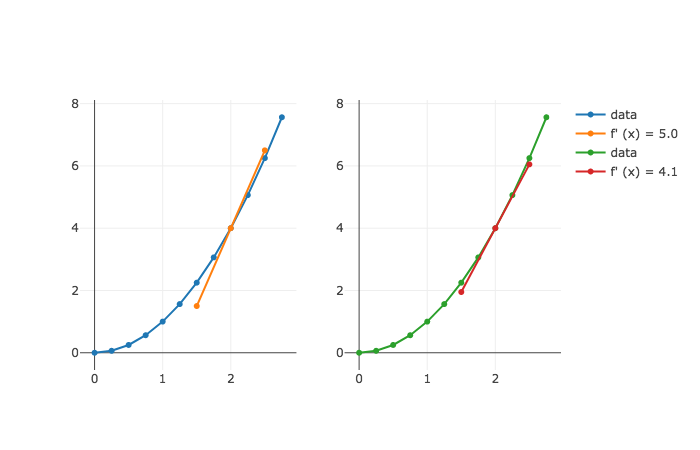

> The graphs above illustrate when $\Delta x = 1$  and when $\Delta x = .1$  The graph to the left, with a smaller $\Delta x$ has a more tangent line.

Let's keep decreasing $\Delta x$ and see if we can approach the derivative even further.

In [7]:
tangent_x_squared_delta_hundredth = derivative_trace(x_squared, 2, 1, .01)
tangent_x_squared_delta_thousandth = derivative_trace(x_squared, 2, 1, .001)
subplots = make_subplots([trace_x_squared_to_three, tangent_x_squared_delta_hundredth], [trace_x_squared_to_three, tangent_x_squared_delta_thousandth])

NameError: name 'make_subplots' is not defined

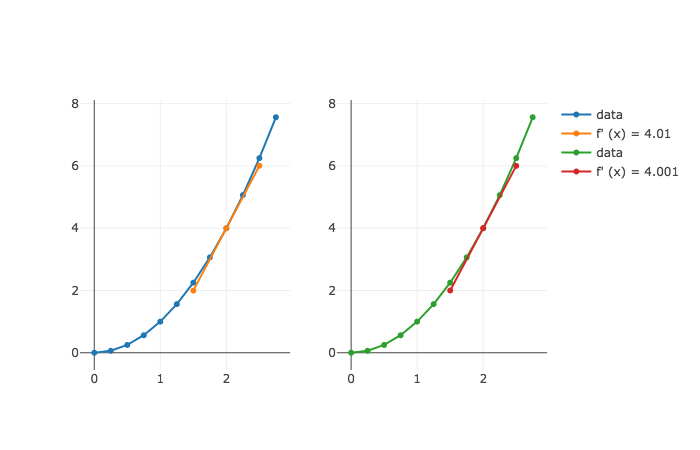

>  $\Delta x = .01$ and $\Delta x = .001$

As you can see, as $\Delta x $ approaches zero, $f'(2) $ approaches $ 4 $.  This convergence around one number as we change another number, is the **limit **.  

### Approaching our formula for a derivative

So to describe the above, at the point $x = 2 $, the **limit** of $\frac{\Delta y}{\Delta x} $ -- that is the number that $\frac{\Delta y}{\Delta x} $ settles upon as  $ \Delta x $ approaches zero -- is 4.  We can abbreviate this into the following expression: 

When $x = 2,\lim_{\Delta x\to0} \frac{\Delta y}{\Delta x} = 4  $.

Or, better yet, we can update and correct our definition of derivative to be:

$$ f'(x) = \lim_{ \Delta x \to0} \frac{f(x + \Delta x) - f(x)}{\Delta x} $$ 

So the derivative is the change in output as we *just nudge* our input.  That is how we calculate *instantaneous rate of change*.  We can determine the runners speed at precisely second number 2, by calculating the runner's speed over shorter and shorter periods of time, to see what that number approaches.

One final definition before we go.  Instead of $\Delta x$, mathematicians sometimes use the variable $h$ to describe the change in inputs.  So replacing our $\Delta x$ symbols with $h$'s we have:

$$ f'(x) = \lim_{ h\to0} \frac{f(x + h) - f(x)}{h} $$ 

Above is the formula for the derivative for all types of functions linear and nonlinear.

### Summary

In this section, we learned about derivatives.  A derivative is the instantaneous rate of change of a function.  To calculate the instantaneous rate of change of a function, we see the value that $\frac{\Delta y}{\Delta x} $ approaches as $\Delta x $ approaches zero.  This way, we are not calculating the rate of change of a function across a given distance.  Instead we are finding the rate of change at a specific moment. 